# GITHUB vs SOURCEFORGE vs OTHER 
## Exploring data (below here can be removed temporary)

In [239]:
from __future__ import division
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import pylab as pl
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt


class my_colors: 
    red = (1.0,0.2,0.1)
    orange = (1.0,0.6,0.2)
    green = (0.3,0.9,0.3)
    blue = (0.3,0.7,1.0)

In [240]:
links = pd.read_csv('../links.bulk.csv')
# links = links.sort_values(by=['year'])
# links = links[(links.year >= initial_year)]
links.head()

,type,journal,id,year,link,code,flag.uniqueness
0,abstract,Nucleic_Acids_Res,23155066.0,2013,http://www.netlab.uky.edu/p/bioinfo/DiffSplice,200,0
1,abstract,Bioinformatics,27273673.0,2017,http://www.cs.helsinki.fi/u/lmsalmel/LoRMA/,302,0
2,abstract,BMC_Bioinformatics,20492656.0,2010,http://www.cse.univdhaka.edu/~ashis/ppred/inde...,301,0
3,abstract,PLoS_Comput_Biol,28212402.0,2017,https://dongjunchung.github.io/GGPA/,301,0
4,abstract,Bioinformatics,28130230.0,2017,https://github.com/bfosso/MetaShot,301,0


Parsing from code into human-readable status:

* -1 : time out
* 0..299 : good
* 300..399 : redirected
* \>= 400 : not found

In [241]:

conditions = [
    (links['link'].str.contains("github")==True),
    (links['link'].str.contains("sourceforge")==True)]

choices = ['GitHub', 'SourceForge']
links['source'] = np.select(conditions, choices, default='Other')



conditions = [
    ((links['code']>=0) & (links['code']<=299)),
    ((links['code']==-1)),
    ((links['code']>=400)),
    ((links['code']>=300) & (links['code']<=399))
            ]

choices = ['Good', 'Time Out', 'Not Found', 'Redirected']


links['status'] = np.select(conditions, choices)


conditions = [
    (((links['code']>=0) & (links['code']<=299)) | ((links['code']>=300) & (links['code']<=399))),
    (((links['code']==-1)) | ((links['code']>=400))),
    
            ]

choices = [1, 0]

links['binary_status'] = np.select(conditions, choices)
print (len(links))

48392


In [242]:
links_size = links.groupby(['source', ]).size()

# print links_size[0], links_size[1], links_size[2]
# links_size.head()

links[links.source=='GitHub'].head()

,type,journal,id,year,link,code,flag.uniqueness,source,status,binary_status
3,abstract,PLoS_Comput_Biol,28212402.0,2017,https://dongjunchung.github.io/GGPA/,301,0,GitHub,Redirected,1
4,abstract,Bioinformatics,28130230.0,2017,https://github.com/bfosso/MetaShot,301,0,GitHub,Redirected,1
5,abstract,Nucleic_Acids_Res,20935049.0,2011,http://github.com,301,0,GitHub,Redirected,1
42,abstract,Bioinformatics,23178637.0,2013,https://github.com/bioclipse,301,0,GitHub,Redirected,1
54,abstract,BMC_Genomics,24564637.0,2013,http://www.github.com/zhandong/Logit-Lapnet,301,0,GitHub,Redirected,1


In [254]:
links_status_size = pd.DataFrame({'count' : links.groupby(['source','binary_status', ]).size()}).reset_index()
links_github_size = links_status_size[links_status_size['source']=='GitHub']
links_sf_size = links_status_size[links_status_size['source']=='SourceForge']
links_other_size = links_status_size[links_status_size['source']=='Other']


links_status_size.head(100)

,source,binary_status,count
0,GitHub,0,29
1,GitHub,1,2308
2,Other,0,11869
3,Other,1,32977
4,SourceForge,0,48
5,SourceForge,1,1161


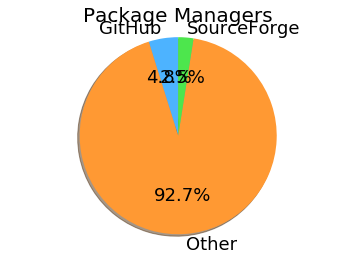

In [256]:
mpl.rcParams['font.size'] = 18
labels = [i for i in links_size.index]
sizes = [i for i in links_size]
values = [my_colors.blue, my_colors.orange, my_colors.green]
fig1, ax1 = pl.subplots()

ax1.set_title("Package Managers", fontsize=20)
patches, texts, autotexts= ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
texts[2].set_fontsize(18)
pl.show()


# pl.savefig('Figures_2/Difficulty_pie.pdf')

IndexError: list index out of range

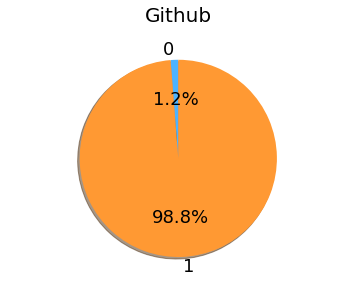

In [258]:
mpl.rcParams['font.size'] = 18
labels = [i for i in list(links_github_size.binary_status)]
sizes = [i for i in list(links_github_size['count'])]
values = [my_colors.blue, my_colors.orange, my_colors.green, my_colors.red]
fig1, ax1 = pl.subplots()

ax1.set_title("Github\n", fontsize=20)
patches, texts, autotexts= ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
texts[2].set_fontsize(18)
pl.show()


IndexError: list index out of range

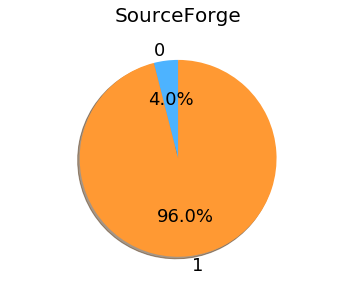

In [259]:
mpl.rcParams['font.size'] = 18
labels = [i for i in list(links_sf_size.binary_status)]
sizes = [i for i in list(links_sf_size['count'])]
values = [my_colors.blue, my_colors.orange, my_colors.green, my_colors.red]
fig1, ax1 = pl.subplots()

ax1.set_title("SourceForge\n", fontsize=20)
patches, texts, autotexts= ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
texts[2].set_fontsize(18)
pl.show()

IndexError: list index out of range

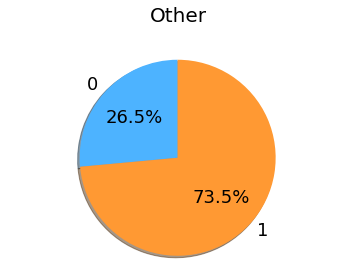

In [260]:
mpl.rcParams['font.size'] = 18
labels = [i for i in list(links_other_size.binary_status)]
sizes = [i for i in list(links_other_size['count'])]
values = [my_colors.blue, my_colors.orange, my_colors.green, my_colors.red]
fig1, ax1 = pl.subplots()

ax1.set_title("Other\n", fontsize=20)
patches, texts, autotexts= ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
texts[2].set_fontsize(18)
pl.show()

In [248]:
links_year_size = pd.DataFrame({'count' : links.groupby( [ "source", "year", ] ).size()}).reset_index()
links_year_size.head()


,source,year,count
0,GitHub,2009,2
1,GitHub,2010,17
2,GitHub,2011,21
3,GitHub,2012,56
4,GitHub,2013,107


In [252]:
links_year_size_status = pd.DataFrame({'count' : links.groupby( [ "source", "year", "binary_status"] ).size()}).reset_index()

links_year_size_status.head()

stacked_barplot = pd.DataFrame({'count': links.groupby (["year","source"]).size()}).reset_index()
stacked_barplot.head()


github = [i for i in stacked_barplot[stacked_barplot.source=='GitHub']['count']]
other = [i for i in stacked_barplot[stacked_barplot.source=='Other']['count']]
sourceforge = [i for i in stacked_barplot[stacked_barplot.source=='SourceForge']['count']]


print (github)
print (other)
print (sourceforge)

for i in range(len(other) - len(github)):
    github = [0] + github
    
for i in range(len(other) - len(sourceforge)):
    sourceforge = [0] + sourceforge
    
all = [x + y + z for x, y, z in zip(other, sourceforge, github)]

github = [x/y for x,y in zip(github, all)]
sourceforge = [x/y for x,y in zip(sourceforge, all)]
other = [x/y for x,y in zip(other, all)]


for x,y,z in zip(sourceforge, github, other):
    print (x *100, y*100, z*100)

print ('')
print (github)
print (other)
print (sourceforge)

[2L, 17L, 21L, 56L, 107L, 283L, 500L, 677L, 674L]
[69L, 105L, 238L, 293L, 396L, 2327L, 2174L, 2122L, 2757L, 3775L, 3820L, 3498L, 3583L, 3930L, 4793L, 4149L, 3826L, 2991L]
[1L, 6L, 1L, 8L, 33L, 52L, 41L, 62L, 90L, 120L, 102L, 139L, 106L, 153L, 122L, 112L, 61L]
(0.0, 0.0, 100.0)
(0.9433962264150944, 0.0, 99.05660377358491)
(2.459016393442623, 0.0, 97.54098360655738)
(0.3401360544217687, 0.0, 99.65986394557824)
(1.9801980198019802, 0.0, 98.01980198019803)
(1.3983050847457628, 0.0, 98.60169491525423)
(2.336028751123091, 0.0, 97.66397124887692)
(1.8955154877484977, 0.0, 98.1044845122515)
(2.199361475700603, 0.0, 97.8006385242994)
(2.3273855702094646, 0.0517196793379881, 97.62089475045255)
(3.0326004548900682, 0.429618397776093, 96.53778114733383)
(2.8169014084507045, 0.579950289975145, 96.60314830157415)
(3.679195341450503, 1.4822657490735838, 94.83853890947591)
(2.5585324643977794, 2.5826695631185133, 94.85879797248371)
(2.9259896729776247, 5.4121246892331225, 91.66188563778925)
(2.5571159

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017]


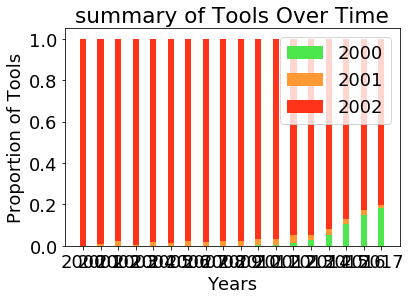

In [250]:

ind = np.arange(2000,2018,1)    # the x locations for the groups
print ind
width = 0.35       # the width of the bars: can also be len(x) sequence


p1 = plt.bar(ind, github, width, color=my_colors.green)
    
p2 = plt.bar(ind, sourceforge, width, color=my_colors.orange,
             bottom=github)

p3 = plt.bar(ind, other, width, color=my_colors.red,
             bottom=np.array(sourceforge)+np.array(github))

plt.ylabel('Proportion of Tools')
plt.xlabel('Years')
plt.title('summary of Tools Over Time')
plt.xticks(ind)
# plt.yticks(np.arange(0, 1.0, 0.1))
plt.legend((p1[0], p2[0], p3[0]), ind)
# plt.ylim(ymax=1.0)
plt.show()

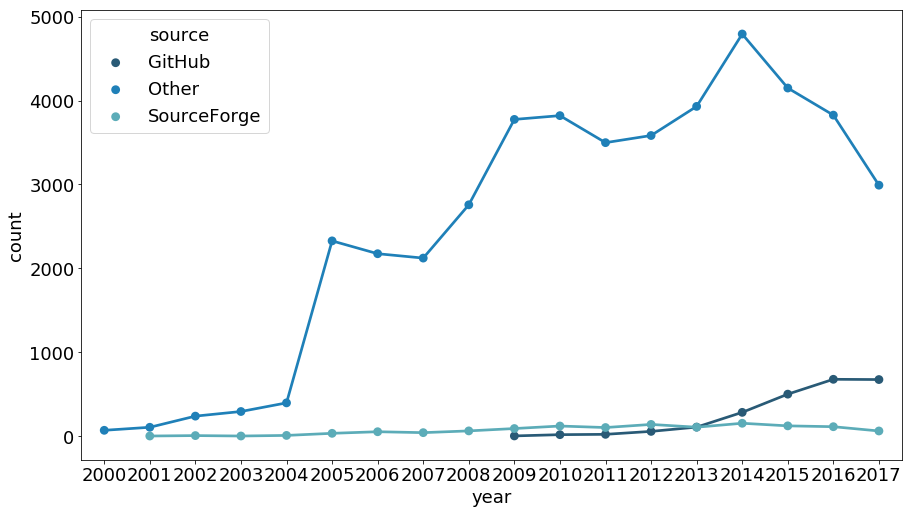

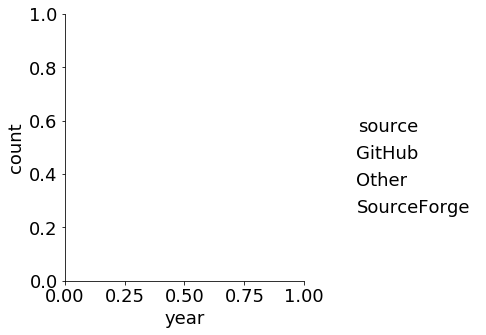

In [253]:
a4_dims = (14.7, 8.27)
fig, ax = mpl.pyplot.subplots(figsize=a4_dims)

sns.catplot(ax = ax, x="year", y="count", hue="source",
                capsize=.2, palette="YlGnBu_d",
                kind="point", data=links_year_size)

In [198]:
# a4_dims = (11.7, 8.27)
# fig, ax = mpl.pyplot.subplots(figsize=a4_dims)

# sns.catplot(ax = ax, x="year", y="count", hue="binary_status",
#                 capsize=.2, palette="YlGnBu_d",
#                 kind="point", data=links_year_size_status[links_year_size_status.source=="GitHub"])

In [199]:
# a4_dims = (11.7, 8.27)
# fig, ax = mpl.pyplot.subplots(figsize=a4_dims)

# sns.catplot(ax = ax, x="year", y="count", hue="binary_status",
#                 capsize=.2, palette="YlGnBu_d",
#                 kind="point", data=links_year_size_status[links_year_size_status.source=="SourceForge"])

In [200]:
# a4_dims = (11.7, 8.27)
# fig, ax = mpl.pyplot.subplots(figsize=a4_dims)

# sns.catplot(ax = ax, x="year", y="count", hue="binary_status",
#                 capsize=.2, palette="YlGnBu_d",
#                 kind="point", data=links_year_size_status[links_year_size_status.source=="Other"])

In [172]:
links.head()

,type,journal,id,year,link,code,flag.uniqueness,source,status,binary_status
0,abstract,Nucleic_Acids_Res,23155066.0,2013,http://www.netlab.uky.edu/p/bioinfo/DiffSplice,200,0,Other,Good,1
1,abstract,Bioinformatics,27273673.0,2017,http://www.cs.helsinki.fi/u/lmsalmel/LoRMA/,302,0,Other,Redirected,1
2,abstract,BMC_Bioinformatics,20492656.0,2010,http://www.cse.univdhaka.edu/~ashis/ppred/inde...,301,0,Other,Redirected,1
3,abstract,PLoS_Comput_Biol,28212402.0,2017,https://dongjunchung.github.io/GGPA/,301,0,GitHub,Redirected,1
4,abstract,Bioinformatics,28130230.0,2017,https://github.com/bfosso/MetaShot,301,0,GitHub,Redirected,1


In [186]:
github_bin = links[links['source']=='GitHub']
other_bin = links[links['source']=='Other']
sourcefor_bin = links[links['source']=='SourceForge']

# fischer = links.groupby(['source', 'binary_status', ]).count()
fisher = pd.DataFrame({'count' : links.groupby(['source', 'binary_status', ]).size()}).reset_index()
fisher_gh = fisher[fisher.source=='GitHub']
fisher_sf = fisher[fisher.source=='SourceForge']
fisher_oth = fisher[fisher.source=='Other']

print (fisher_gh)

fisher.head(10)

   source  binary_status  count
0  GitHub              0     29
1  GitHub              1   2308


,source,binary_status,count
0,GitHub,0,29
1,GitHub,1,2308
2,Other,0,11869
3,Other,1,32977
4,SourceForge,0,48
5,SourceForge,1,1161


## Statistical Analysis 

### https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.fisher_exact.html

In [195]:
s_test_gh_v_oth = stats.fisher_exact([list(fisher_gh['count']), 
                             list(fisher_oth['count'])])

s_test_gh_v_sf = stats.fisher_exact([list(fisher_gh['count']), 
                             list(fisher_sf['count'])])

print s_test_gh_v_oth
print s_test_gh_v_sf

(0.03491075231590151, 2.1108319487687653e-250)
(0.3039157279029463, 3.3784879825792969e-07)
